In [1]:
asdf=1

1

In [2]:
using Intervalos, Graficador
using PyPlot

INFO: Loading help data...


#[1]
##### Escribe una función que calcule el operador de Newton para un intervalo $X$, dadas $f(x)$ y $f′(x)$.

In [3]:
ptomedio(x::Intervalo)= (x.a + x.b)/2

newtonIntervalo(x::Intervalo,f::Function,ff::Function)= ptomedio(x) - f(ptomedio(x))/ff(x)

newtonIntervalo (generic function with 1 method)

Voy a implementar un par de funciones que den la unión o intersección de un par de intervalos. Si los intervalos no se intersectan las funciones arrojan un error

In [4]:
uNir(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(min(x.a,y.a),max(x.b,y.b)) : 
                                                                error("Deben ser intervalos que se intersectan")
iNtersectar(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(max(x.a,y.a),min(x.b,y.b)) : 
                                                                error("Deben ser intervalos que se intersectan")

iNtersectar (generic function with 1 method)

#[2]
##### Implementa el método de Newton para intervalos para encontrar las raíces de $f(x)=x^3−1$ a partir de $X=[−3,3]$. Muestra gráficamente la implementación del método. En cada iteración subsecuente del método, ilustra qué le pasa al diámetro de la refincación del intervalo que vas obteniendo.

In [53]:
function cerosNewtonAux(x::Intervalo,f::Function,ff::Function,n::Int64)
    if n>3
        println(x)
        return "Más de 100 iteraciones"
    elseif norm(redonUP(-,x.b,x.a))<2.0^-30 
        return x
    else
        n+=1
        cerosNewtonAux( iNtersectar(x,newtonIntervalo(x,f,ff))  , f , ff , n)
    end
end

cerosNewton(x::Intervalo,f::Function,ff::Function)=cerosNewtonAux(x::Intervalo,f::Function,ff::Function,1)

cerosNewton (generic function with 1 method)

In [54]:
cerosNewton(interv1,f1,f2)

[1.119837448309931898629876041048700831509144473417338273797090161289464996798915e+00,
1.248437738149672306050906873952141441853376009754610577655845145557079713458323e+00]


"Más de 100 iteraciones"

In [66]:
asdf=interv5
ptomedio(asdf)-f1(ptomedio(asdf))/f2(asdf)

[1.119837448309931898629876041048700831509144473417338273797090161289464996798915e+00,
5.623612038781746287845687766686782306733165862869764513438294460237262028522043e+01]

In [37]:
f1(x)=x^3-1
f2(x)=x^2
interv1=Intervalo(-3,3)
interv2=newtonIntervalo(interv1,f1,f2)
interv3=iNtersectar(interv1,interv2)
interv4=newtonIntervalo(interv3,f1,f2)
interv5=iNtersectar(interv3,interv4)
interv6=newtonIntervalo(interv5,f1,f2)
interv7=iNtersectar(interv5,interv6)

[1.119837448309931898629876041048700831509144473417338273797090161289464996798915e+00,
1.248437738149672306050906873952141441853376009754610577655845145557079713458323e+00]

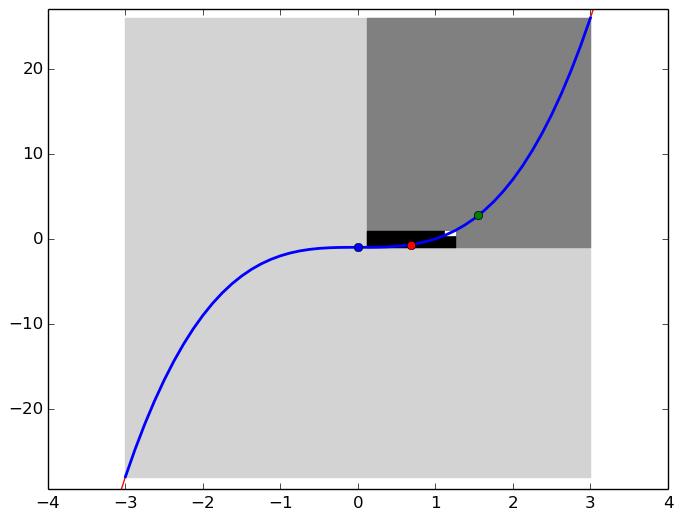

In [67]:
eme=ptomedio(interv1)
graficaarea(float64(interv1.a),float64(interv1.b),f1)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"o")

polY=f1(interv3)
PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY.a),float64(polY.b),color="gray")
eme=ptomedio(interv3)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"o")

polY=f1(interv5)
PyPlot.fill_between(Float64[interv5.a,interv5.b],float64(polY.a),float64(polY.b),color="black")
eme=ptomedio(interv5)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"o")

polY=f1(interv7)
PyPlot.fill_between(Float64[interv7.a,interv7.b],float64(polY.a),float64(polY.b),color="white")
#eme=ptomedio(interv7)
#PyPlot.plot(Float64[eme],Float64[f1(eme)],"o")
;